## Use remote sensing for fossil exploration

### Introduction

Fossil exploration is a challenging process that can be aided by remote sensing. By combining soil maps, multispectral imagery, and classified thematic rasters, paleontologists can determine the areas where fossils are most likely to be found. In ArcGIS Online, you can create web maps with different layers and analyze them to find prospective areas to explore.

ArcGIS Image for ArcGIS Online provides additional capabilities to analyze imagery layers as you would in ArcGIS Pro, including raster functions. Raster functions can be used to create new visualizations of input rasters based on raster arithmetic. Through adding, subtracting, or dividing the values in each band, new raster layers can be created that highlight locations where these values are highest. Some of the most common raster arithmetic functions are referred to as indices and are included in ArcGIS Pro and ArcGIS Image for ArcGIS Online. These indices create new visualizations of input raster data based on the raster arithmetic calculation.

### Scenario

Imagine that you are a GIS analyst who is assisting a group of paleontologists to locate areas in Montana that might contain fossils. You will use ArcGIS Image for ArcGIS Online to create a `thematic raster` that highlights concentrations of ferrous, or iron-containing, minerals within a study area.

### **Open an imagery layer in a web map**

On this step, you will begin the process by adding an imagery layer to a web map.

1. Open a web browser, go to www.arcgis.com in new window, and sign in using your MOOC credentials.

2. At the top of the page, to the left of your profile icon, click the Search button  and then type preliminary fossil and press Enter.

3. On the left side, under Filters, turn off the Only Search In Imagery In Action option.

A Preliminary Fossil Exploration `Landsat tiled imagery layer` by Esri Training Services appears in the search results.

4. In the bottom-right corner of the Preliminary Fossil Exploration Landsat item, click Open In Map Viewer.

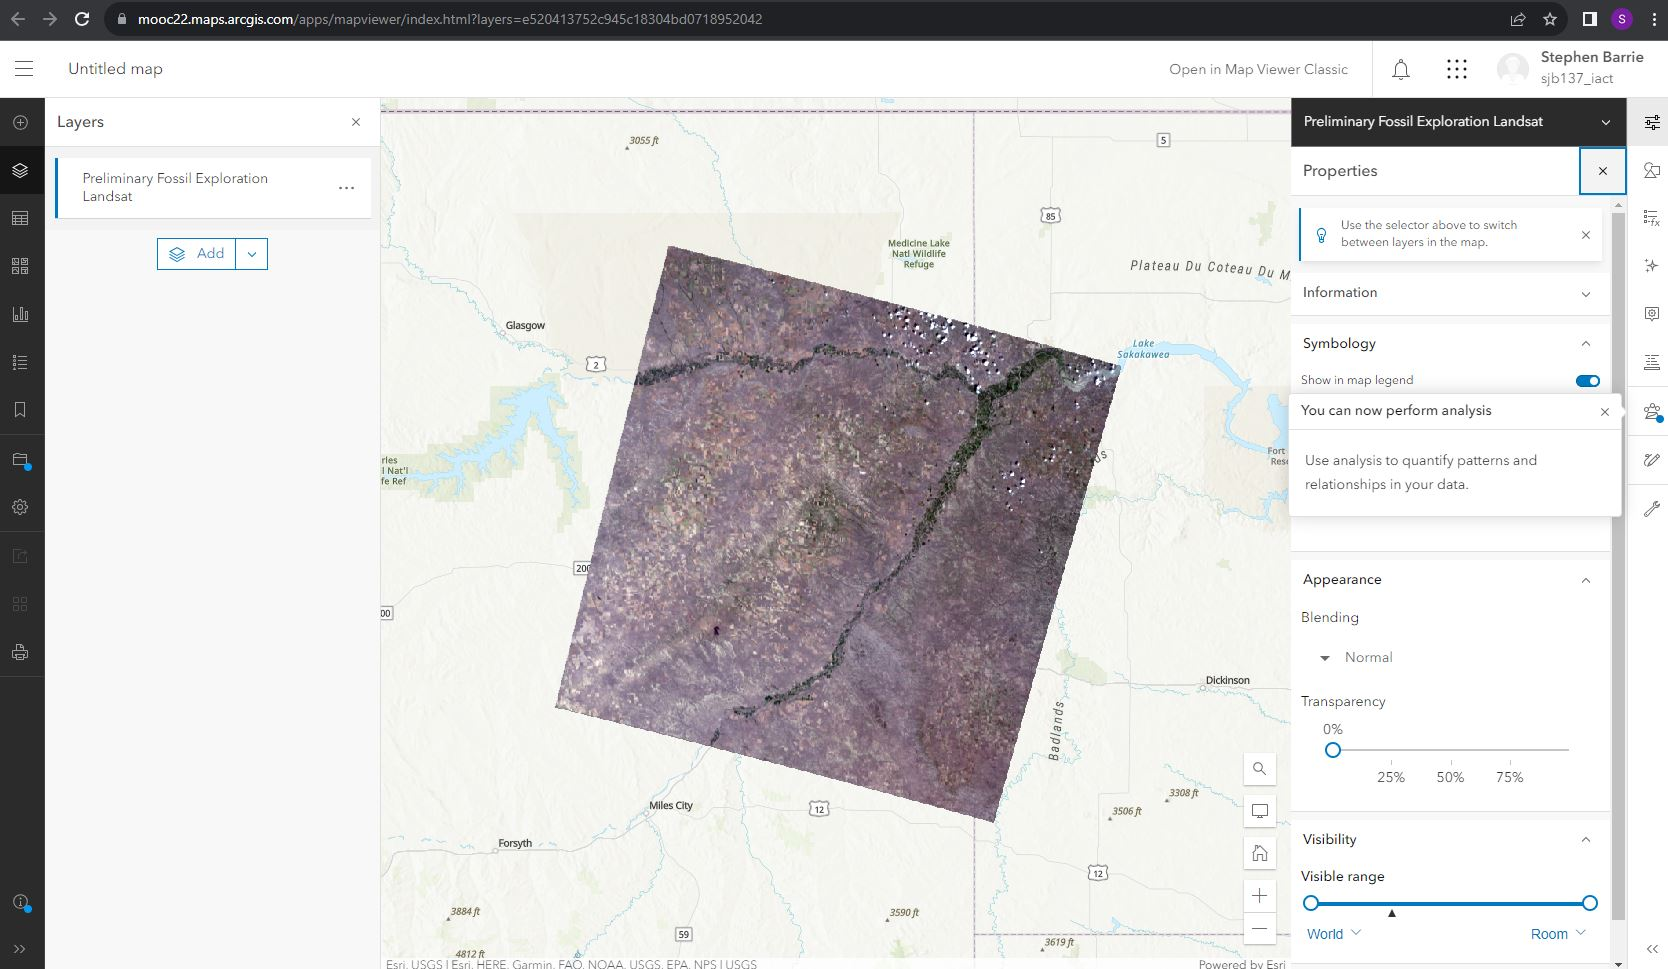

The imagery layer appears in the web map and is rendered with the Natural Color band combination.

> Note: The imagery layer may render differently on your display initially, but it will not affect your results.

5. On the Contents toolbar (left vertical toolbar), click the Save And Open button  and choose Save As.

6. In the Save Map dialog box, specify the following parameters:

- Title: Fossil Exploration `<your initials>`
- Tags: Imagery in Action, Esri, fossil
- Summary: Web map for fossil exploration in the Imagery in Action MOOC.

>Note: Folder should be set to your MOOC username folder, and the map will be saved in My Content.

7. Click Save.

You added an imagery layer to a web map that you will use for your analysis.

### **Review the imagery layer**

In this step, you will review the imagery layer and change the symbology to `make potential fossil areas more visible`.

1. If necessary, in the Layers pane, click the Preliminary Fossil layer to see the available properties displayed in the right pane.

2. On the Settings toolbar (right vertical toolbar), click the Styles button .

3. In the Style pane, under Select Style, for RGB, click Style Options.

4. In the Style Options pane, under RGB, specify the following combination:

- Red: `ShortwaveInfrared_1 (Band 6)`
- Green: `NearInfrared (Band 5)`
- Blue: `Blue (Band 2)`

5. For Stretch Type, choose Standard Deviation.

6. Enable the Apply Dynamic Range Adjustment option.

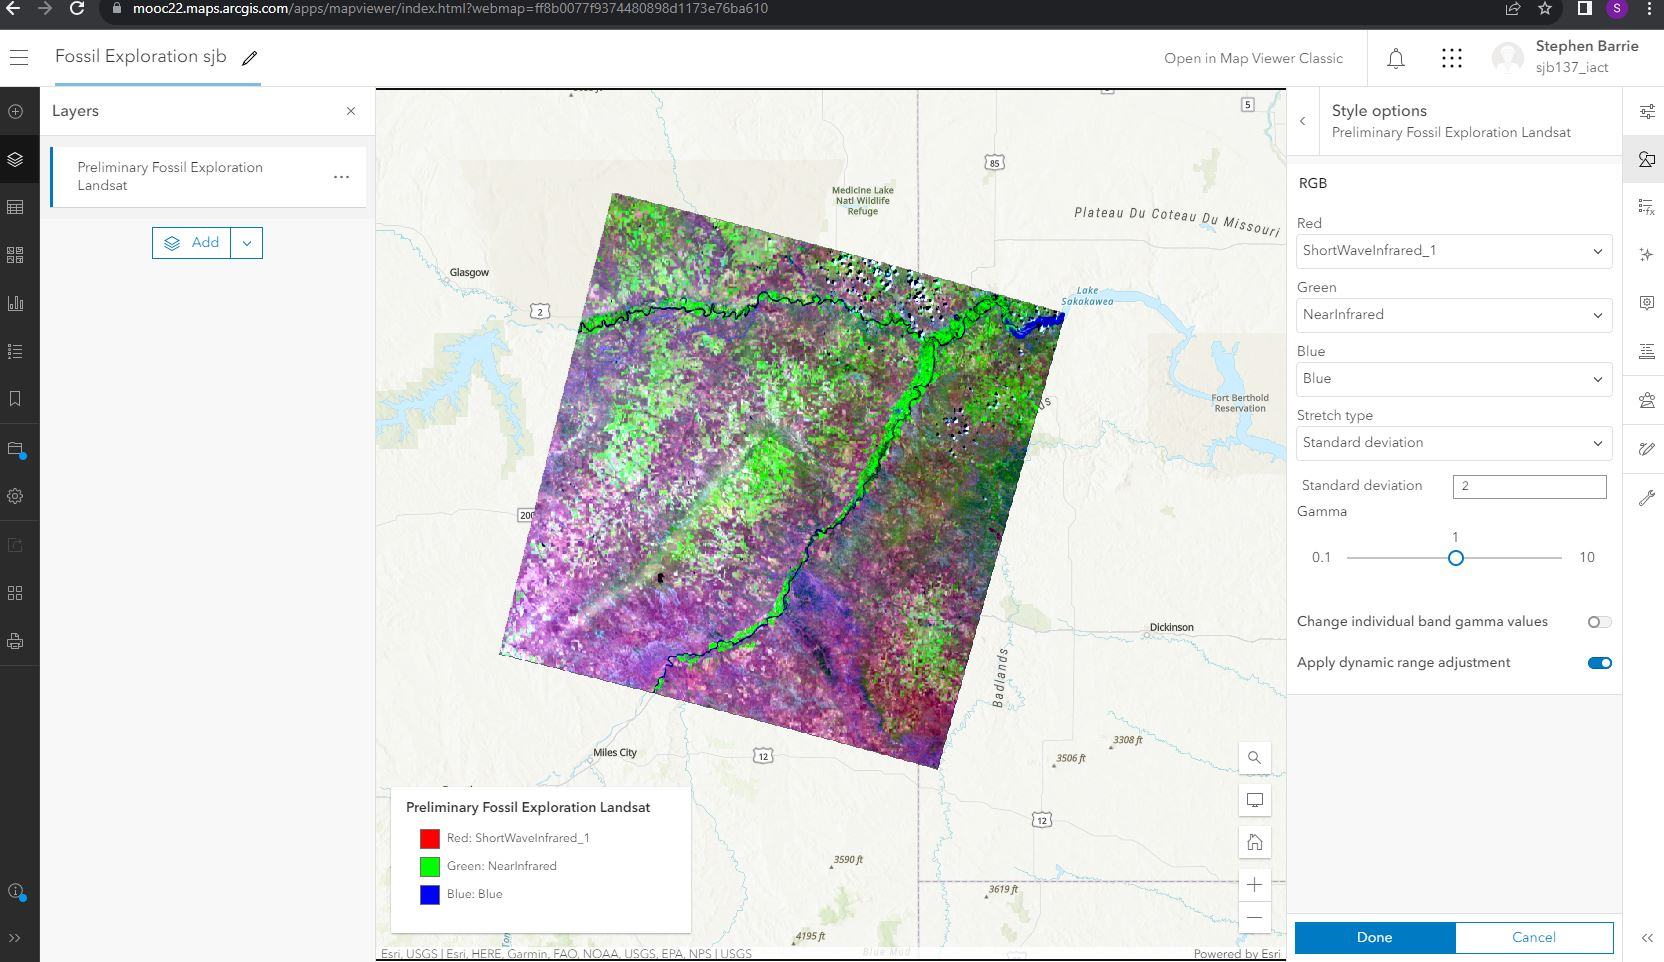

7. Leave the remaining defaults and click Done, and then click Done again to close the Style Options pane.

This raster band combination uses the `Shortwave Infrared (Band 6) and `Near Infrared (Band 5)` bands to more easily view and extract geologic features. Adding Dynamic Range Adjustment (DRA) allows for optimal display of the full range of pixels in the image. You will notice that the various geologic structures are more visible due to the contrasting colors, giving you a visualization of the various types of surfaces that are present in the imagery layer.

8. Pan and zoom to the lower-left area of the web map so that your view is similar to the following graphic.

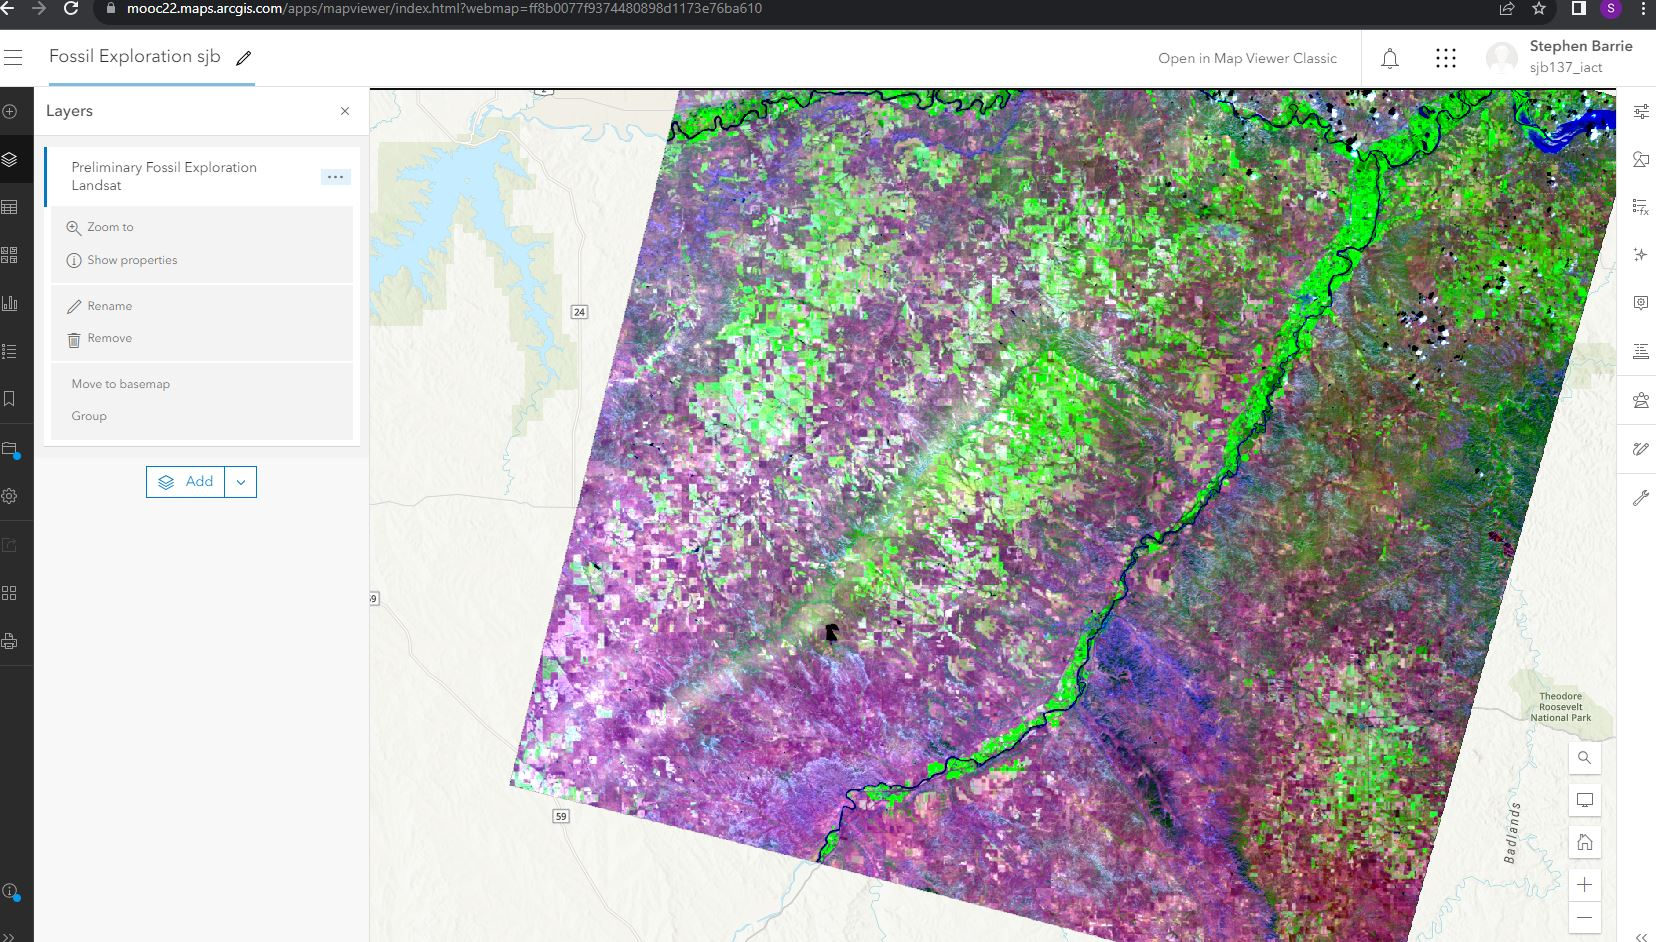

9. Locate the dark area and zoom in.

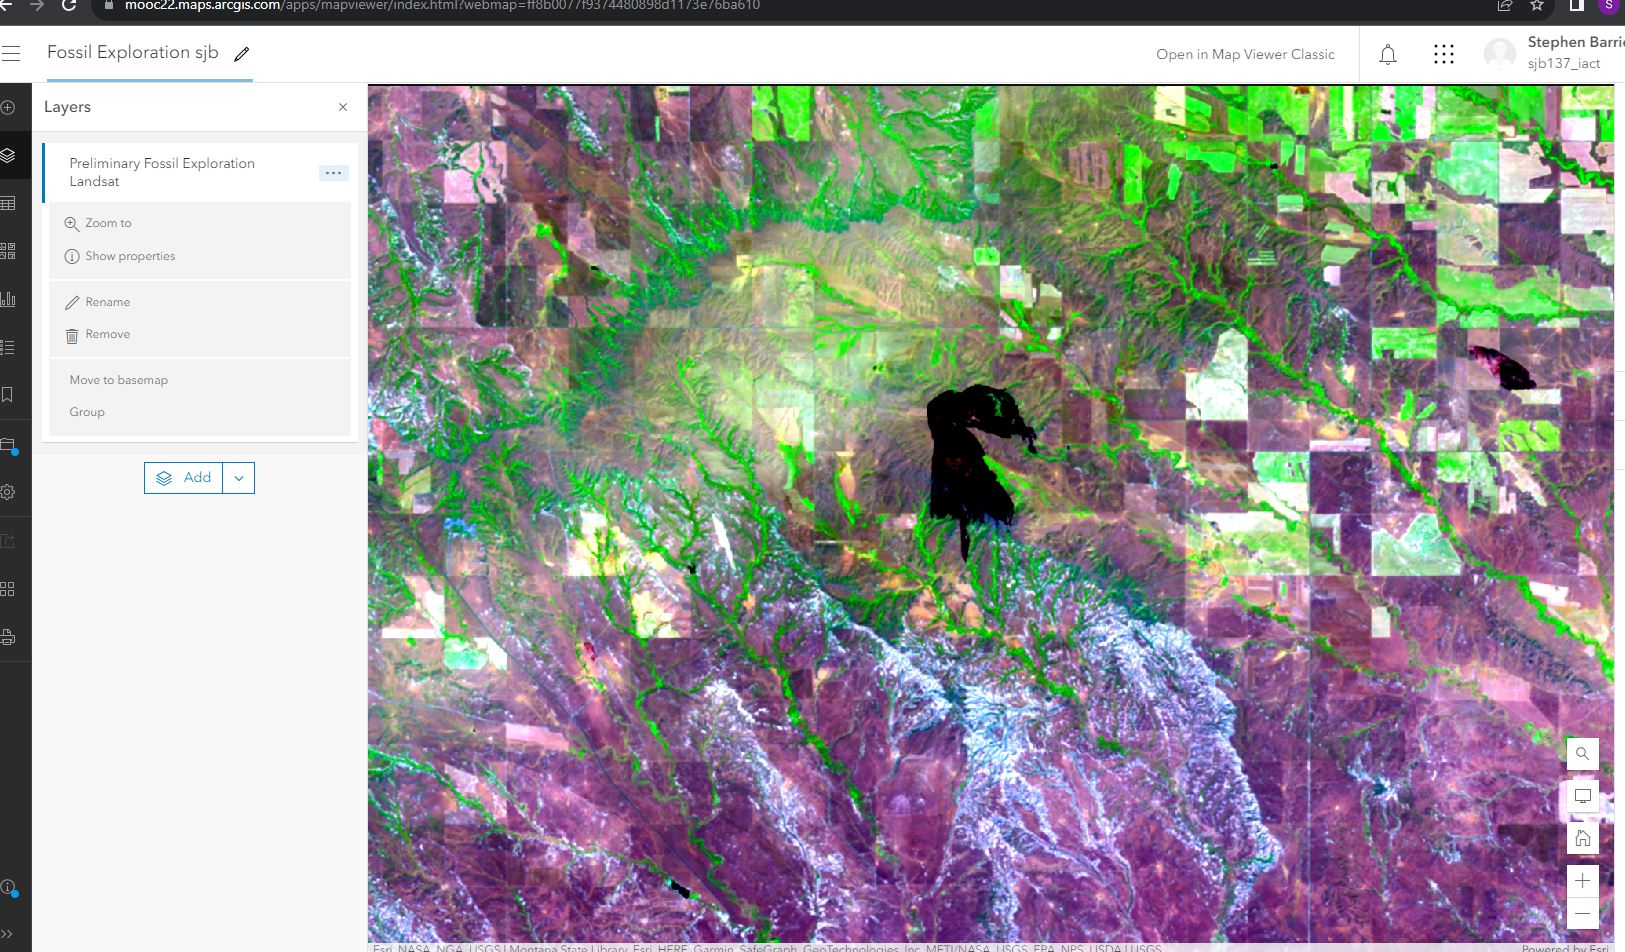

The area is much darker than the surrounding area, evidence of a burn scar from a wildfire. The Shortwave Infrared and Near Infrared raster bands in this band combination can also be used to discover burned areas. For more information about the Burn Area Index, go to ArcGIS Pro Help: [BAI](https://pro.arcgis.com/en/pro-app/latest/arcpy/image-analyst/bai.htm).

10. Save the map.

Later in the analysis, you will consider the pixel values associated with burn scars to avoid including those locations in the search for potential ferrous minerals.

### **Create a thematic raster using a raster function**

In this step, you will use a raster function to create a thematic raster that will highlight the areas containing ferrous mineral concentrations. 

1. On the Settings toolbar, click the Analysis button .

2. In the Analysis pane, click `Raster Functions`. 

3. In the Search By Name field, type **band** and press Enter.

4. Click `Band Arithmetic` to open the Band Arithmetic raster function pane.

The Band Arithmetic function allows you to perform arithmetic functions on the bands of an input raster layer. You can specify your own formula or input a predefined method. You will add the `Ferrous Minerals` ratio method, which divides pixel values from the Shortwave Infrared band by pixel values from the Near Infrared band according to the following formula: `FM = SWIR / NIR`.

5. In the Band Arithmetic raster function pane, for Raster, choose `Preliminary Fossil Exploration Landsat`.

6. For Method, choose `Ferrous Minerals`.

7. For the Band Indexes, type **B6** **B5**.

8. For Output Name type `Ferrous_Minerals_<your initials>` . 

9. Click Estimate Credits to verify that 1 credit will be consumed. 

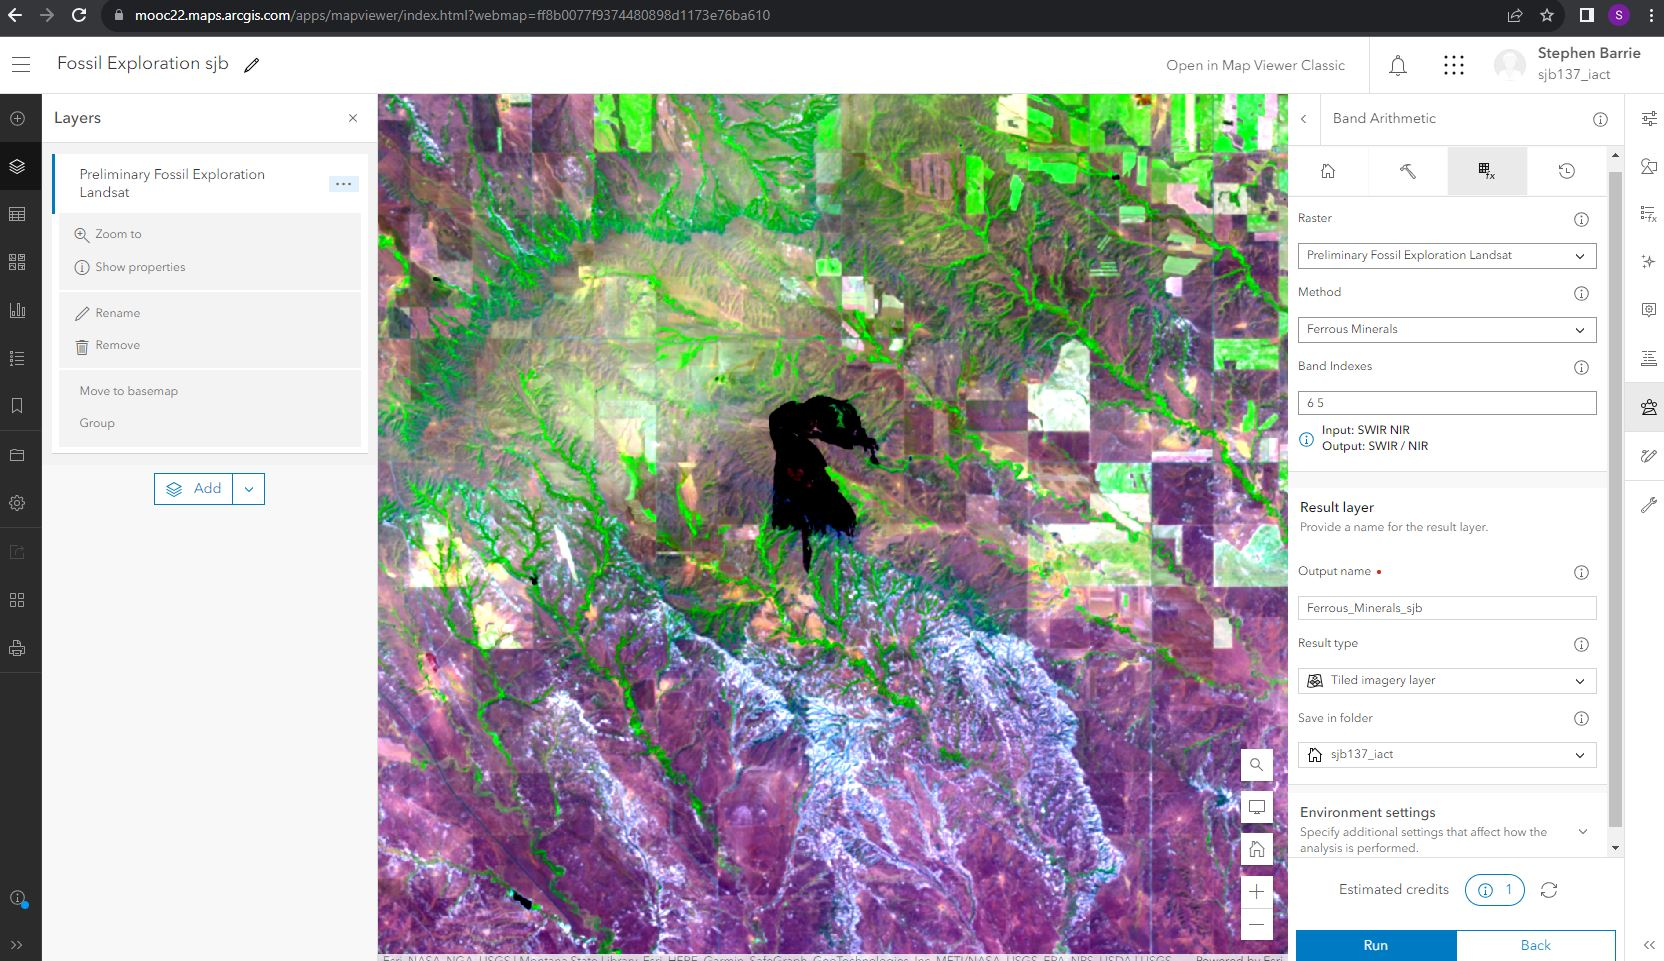

10. Leave the remaining defaults and click Run. 

> Note: Processing may take some time; give this process some time before clicking the web map.

11. When the Band Arithmetic Submitted window appears near the bottom of the map, click `View Status` to view the analysis progression.

When processing completes, the new imagery layer is added to the web map and displayed with a Stretch renderer.

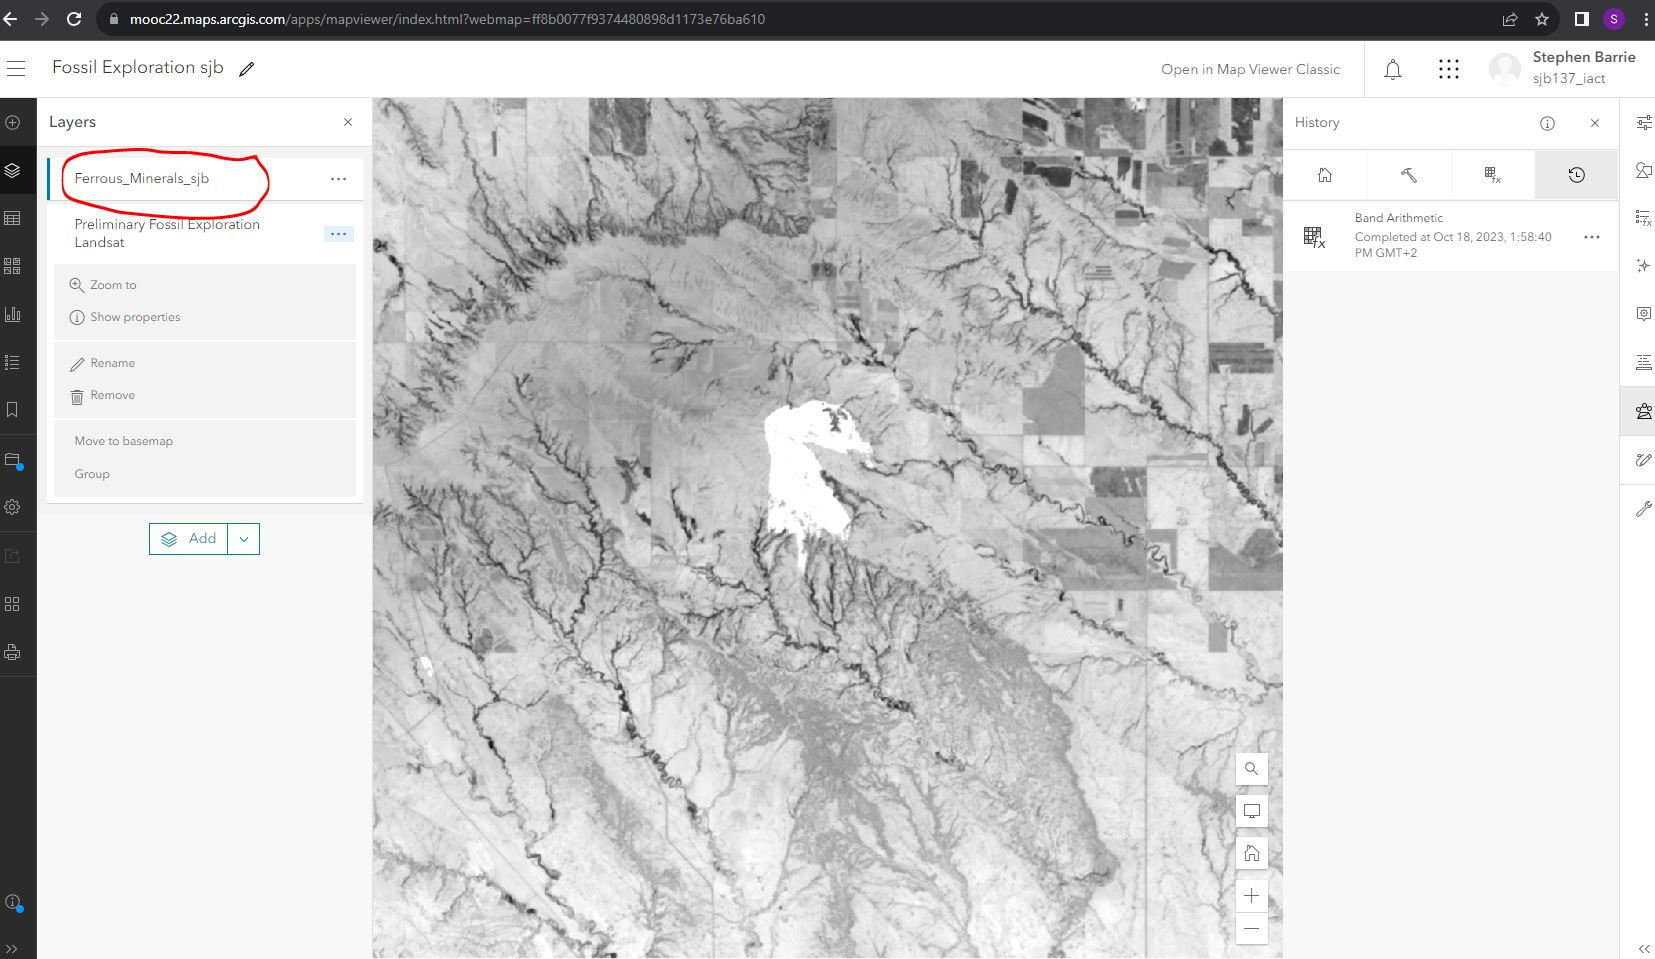

12. In the Layers pane, for the `Ferrous_Minerals_<your initials>` layer, click the Options button  and choose Zoom To.


13. If necessary, in the Layers pane, click the `Ferrous_Minerals_<your initials>` layer to select it. 

14. On the Settings toolbar, click the Fields button .

15. In the `Ferrous_Minerals` Fields pane, click Pixel Value.

16. In the Formatting window, click the Significant Digits drop-down list and choose 2 Decimal Places.

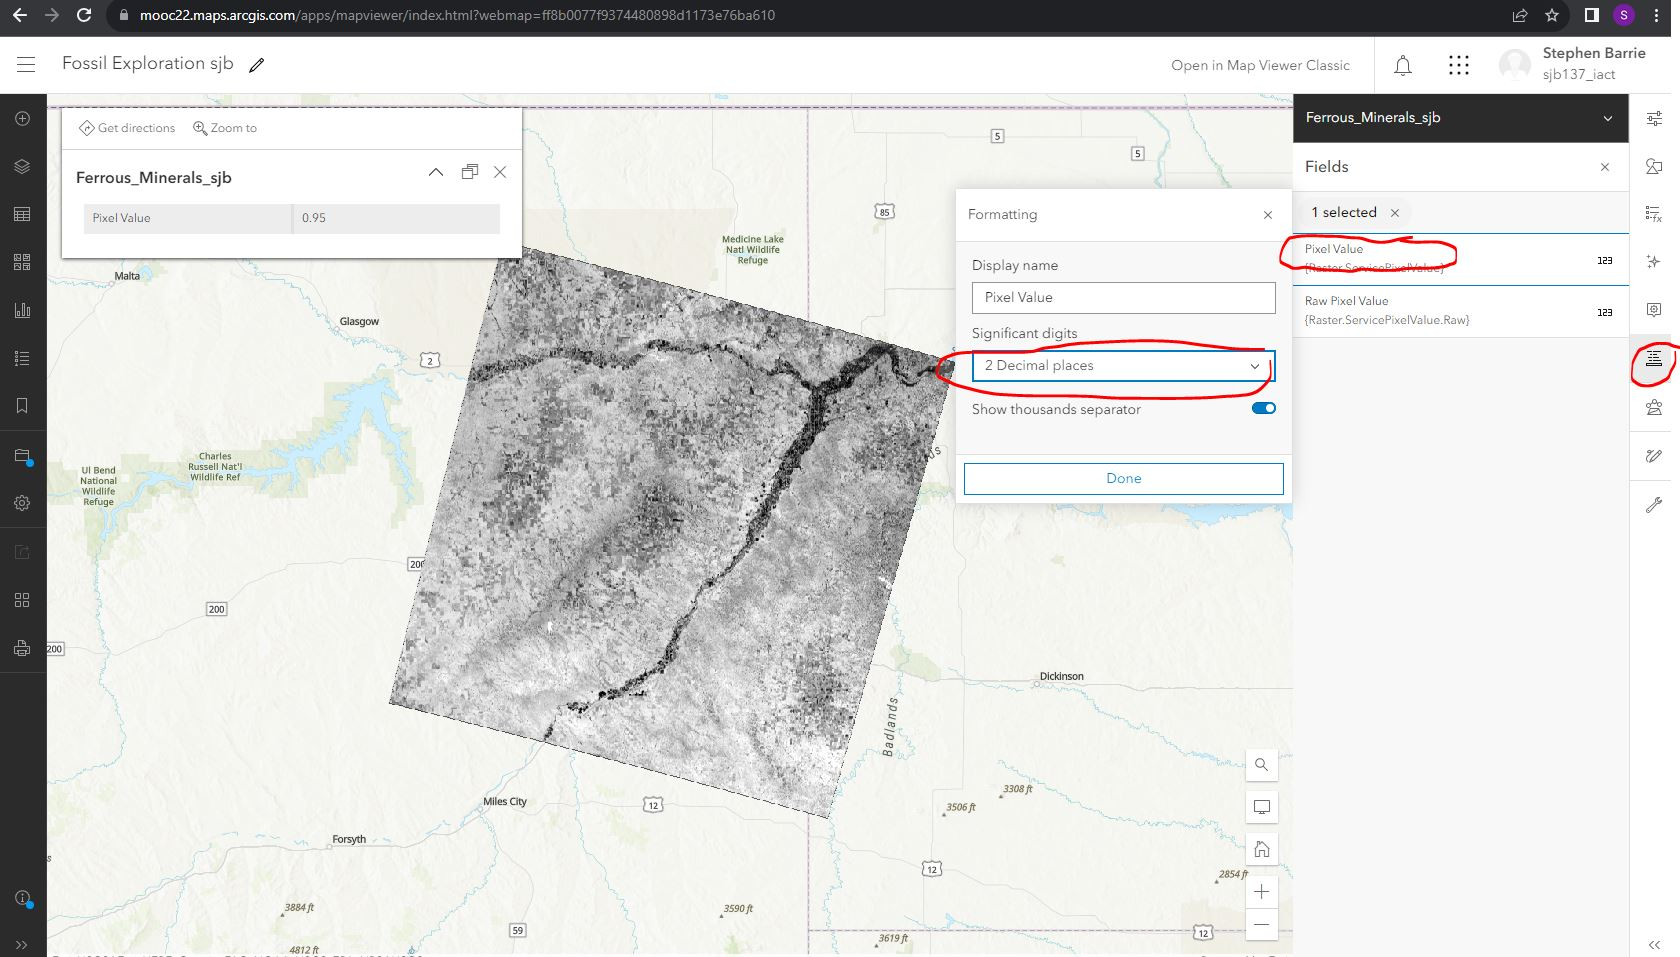

17. Click Done.

18. On the Contents toolbar, click the Legend button .

According to the legend, lighter colors in the image contain higher values. These areas have the highest concentration of ferrous minerals.

19. In the web map, zoom in on the location of the burn scar that you examined earlier.

20. Click multiple points in the burn scar area.

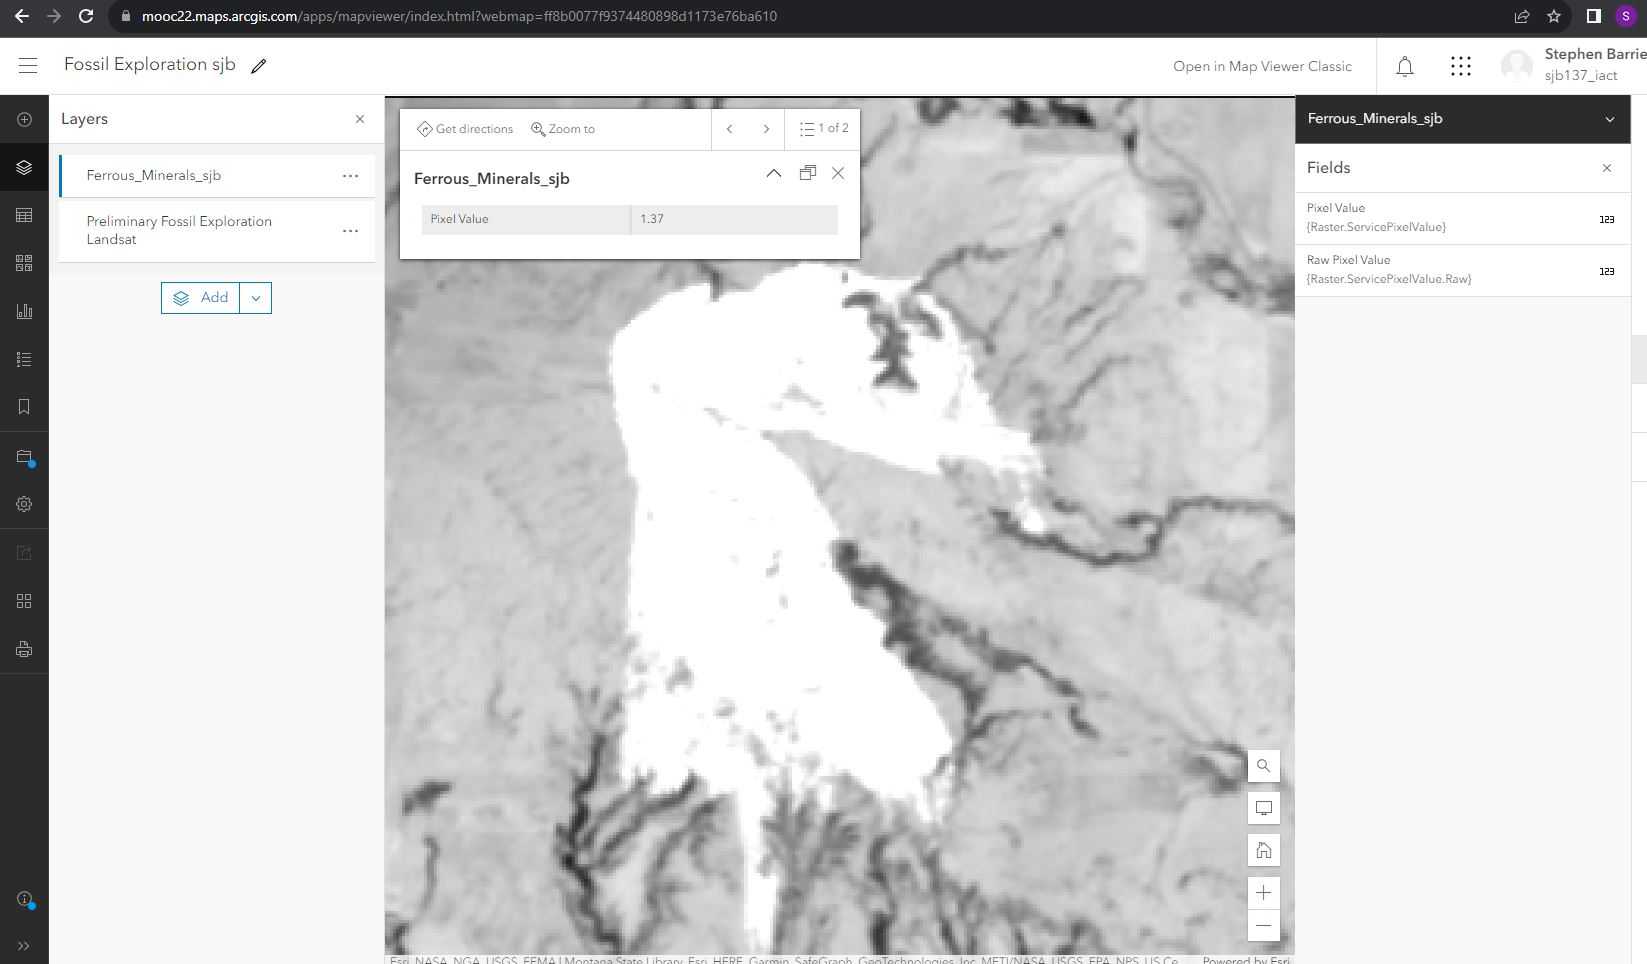

>Note: Depending on where you click in the burn scar area, the pixel values may differ from the preceding graphic.

21. Observe that the majority of pixels in the burn scar have values above 1.3.

22. In the map, zoom out until you can see the entire Ferrous Mineral imagery layer and close the pop-up. 

23. Save the map.

The paleontologists have informed you that locations with ferrous minerals should have a pixel value greater than 1.15. You observed that the majority of pixels in the burn scar have values above 1.3. `The ideal range of values to locate ferrous minerals should be between 1.15 and 1.3.` This knowledge will allow you to locate areas with high concentrations of ferrous minerals while excluding burn scar locations. You will create a function to identify areas meeting the specified criteria. 

### **Add the first raster function (lower threshold value of 1.15)**

You will use raster functions to identify areas of concentrated ferrous minerals. To discover the desired areas, you will create a selection that will reveal the areas that fall within 1.15 to 1.3. In this step, you will configure the first function to find the areas with values greater than 1.15.

1. In the top-left corner, click the Menu button  and choose Home.

2. Near the top of the page, click Content.

3. Near the top-left corner, click New Item.

4. In the New Item window, scroll down and click `Raster Function Template`. 

5. In the Create A New Raster Function Template dialog box, specify the following information:

- Add A Title: `Possible Ferrous Mineral Locations`
- Tags: `Imagery in Action`, `MOOC`, `Esri`, `ferrous minerals`

6. Click Save, and then click Yes to open the Raster Function Editor.

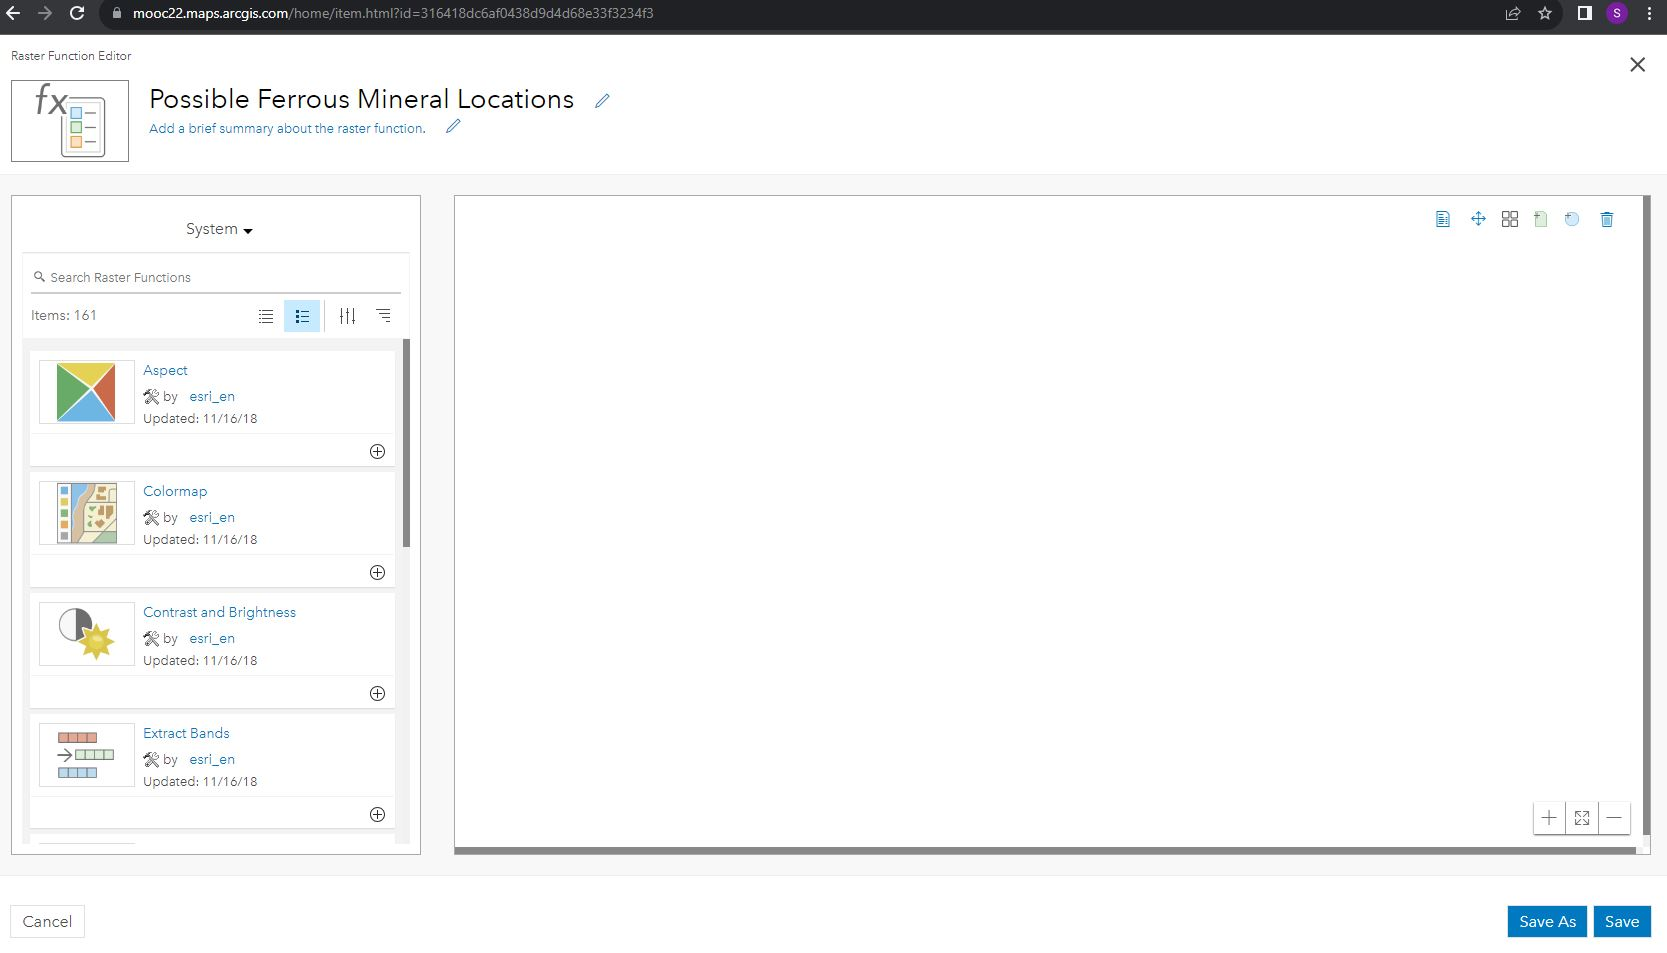

7. In the Search Raster Functions field, type **greater than** and press Enter.

8. For the `Greater Than Equal` raster function, click the Add button  to add it to the Raster Function Template.

9. Double-click the `Greater Than Equal` function to open its properties.

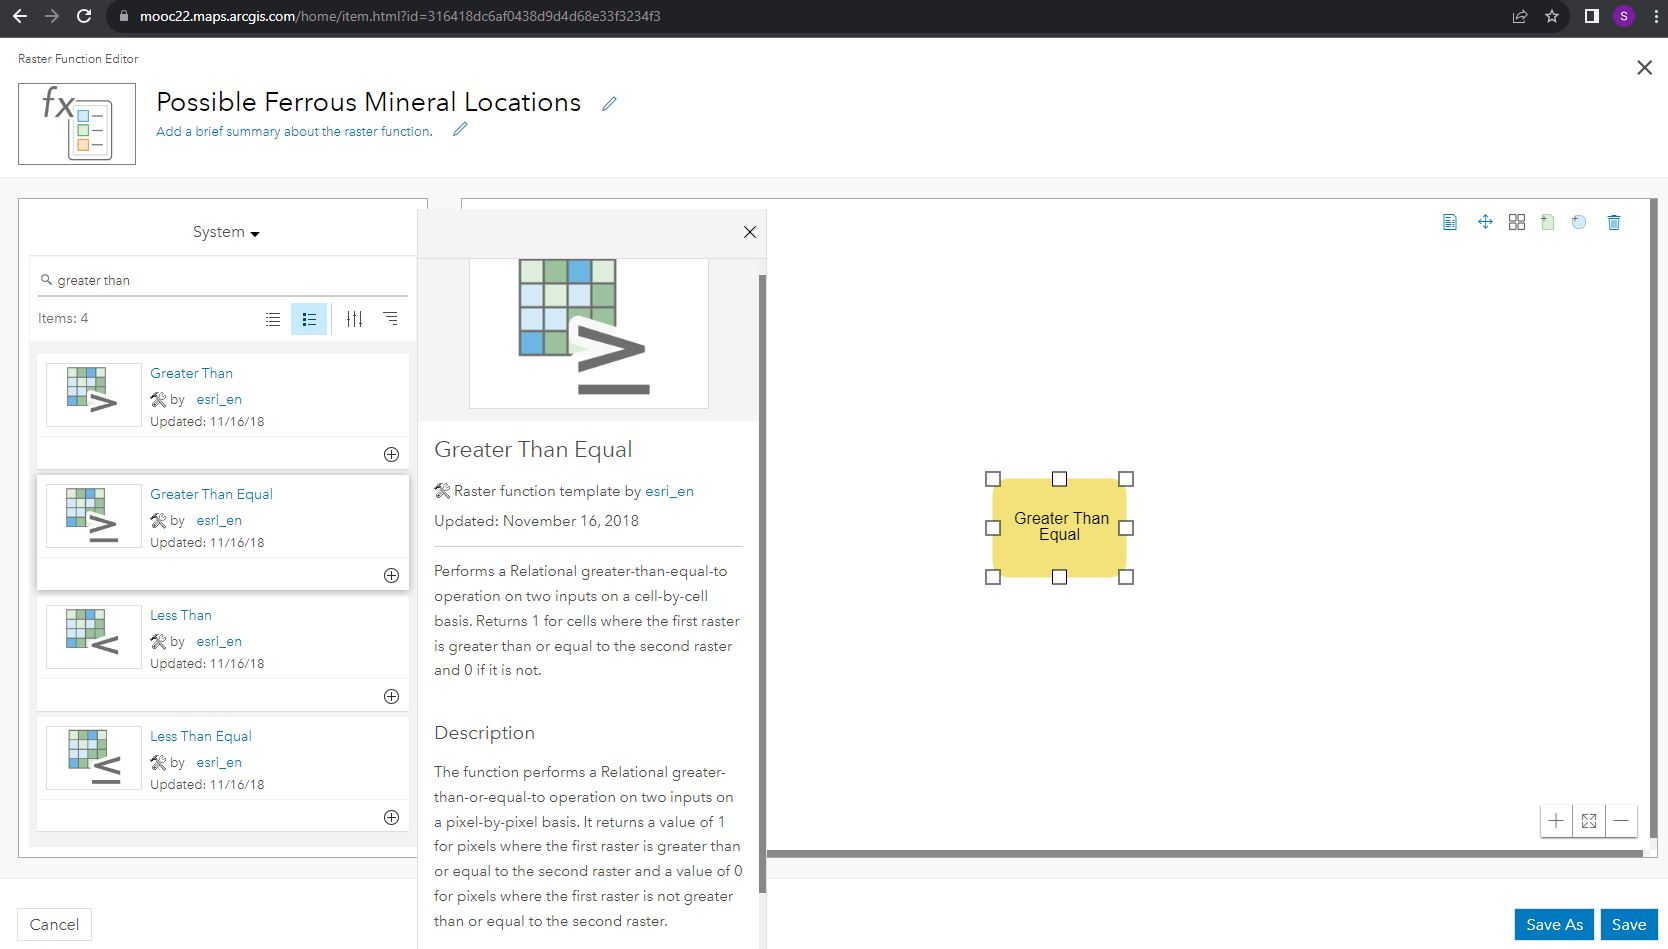

10. In the Greater Than Equal Properties dialog box, on the Parameters tab, for `Raster2`, type **1.15**.

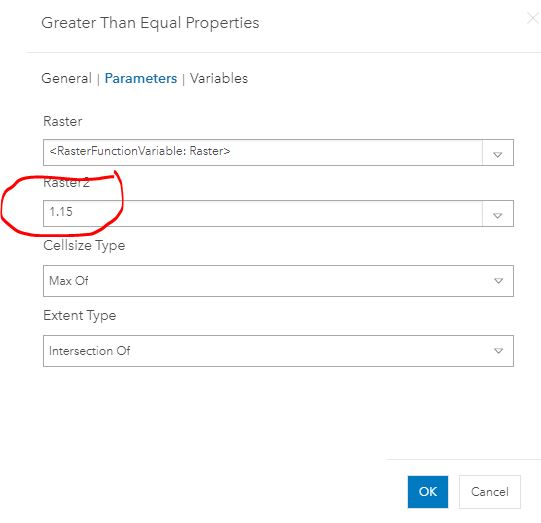

According to the documentation for this function, the variable for Raster2 can be a raster or a value. For this analysis, the variable is the value of 1.15. 

11. Click the Variables tab, and then in the table, modify the following information:

> Note: Be sure to update the names of the rasters to match the following table.

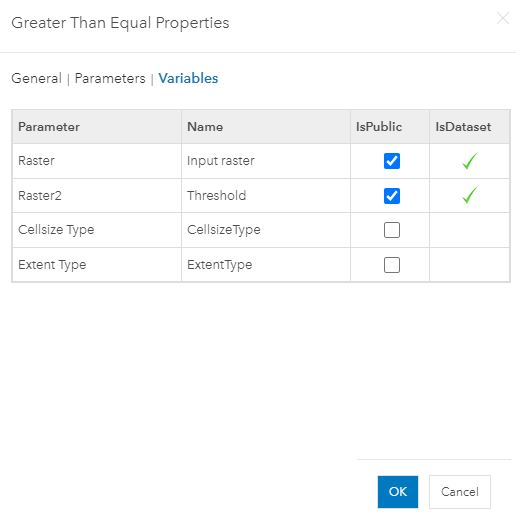

12. Click OK. 

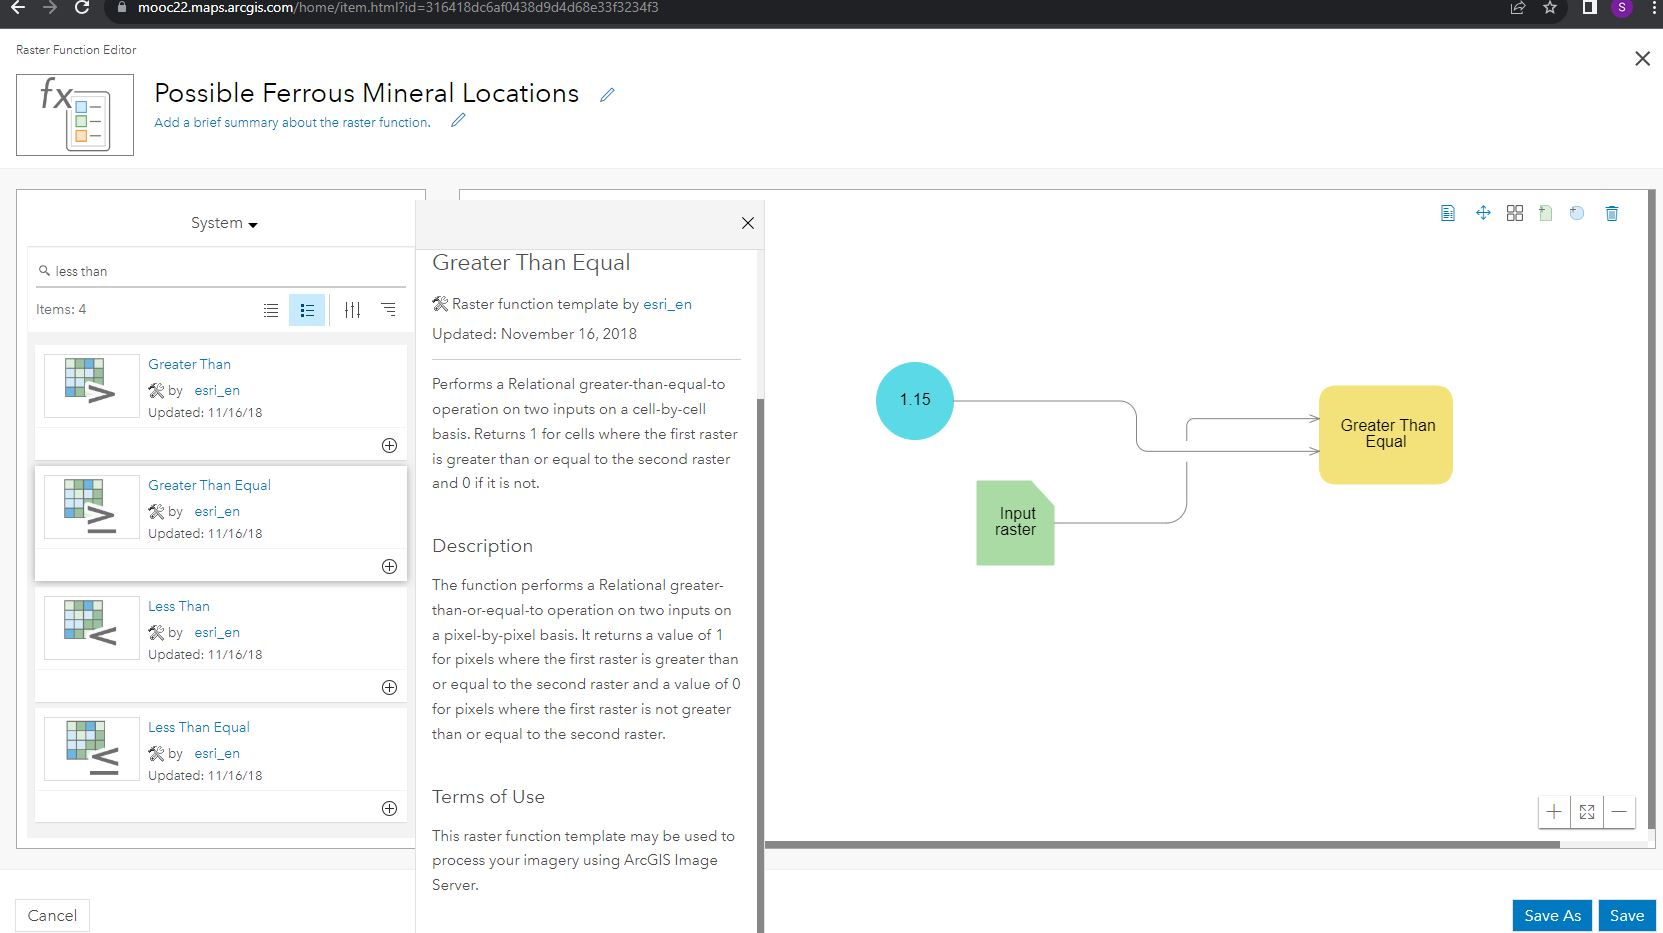

Variables are added to the display based on the modifications that you made to the properties.

You added a raster function to your template that specifies the lower limit of pixel values that you will be using to find ferrous mineral concentrations.

### **Add the second raster function (upper threshold value of 1.3)**

In this step, you will add a second raster function to the Raster Function Template. This raster function will identify pixels in the input raster with values `less than or equal to 1.3`. Excluding pixels with values greater than 1.3 will prevent most burn scar areas from being included in the identification of potential fossil locations.

1. In the left pane, search for less than, and then add the `Less Than Equal` raster function to the Raster Function Template.

2. Double-click the Less Than Equal raster function to open its properties.

3. For `Raster2`, type 1.3.

4. On the Variables tab, change the name of Raster2 to Threshold, and then check the IsPublic box for both the Raster and Threshold variables.

5. Click OK.

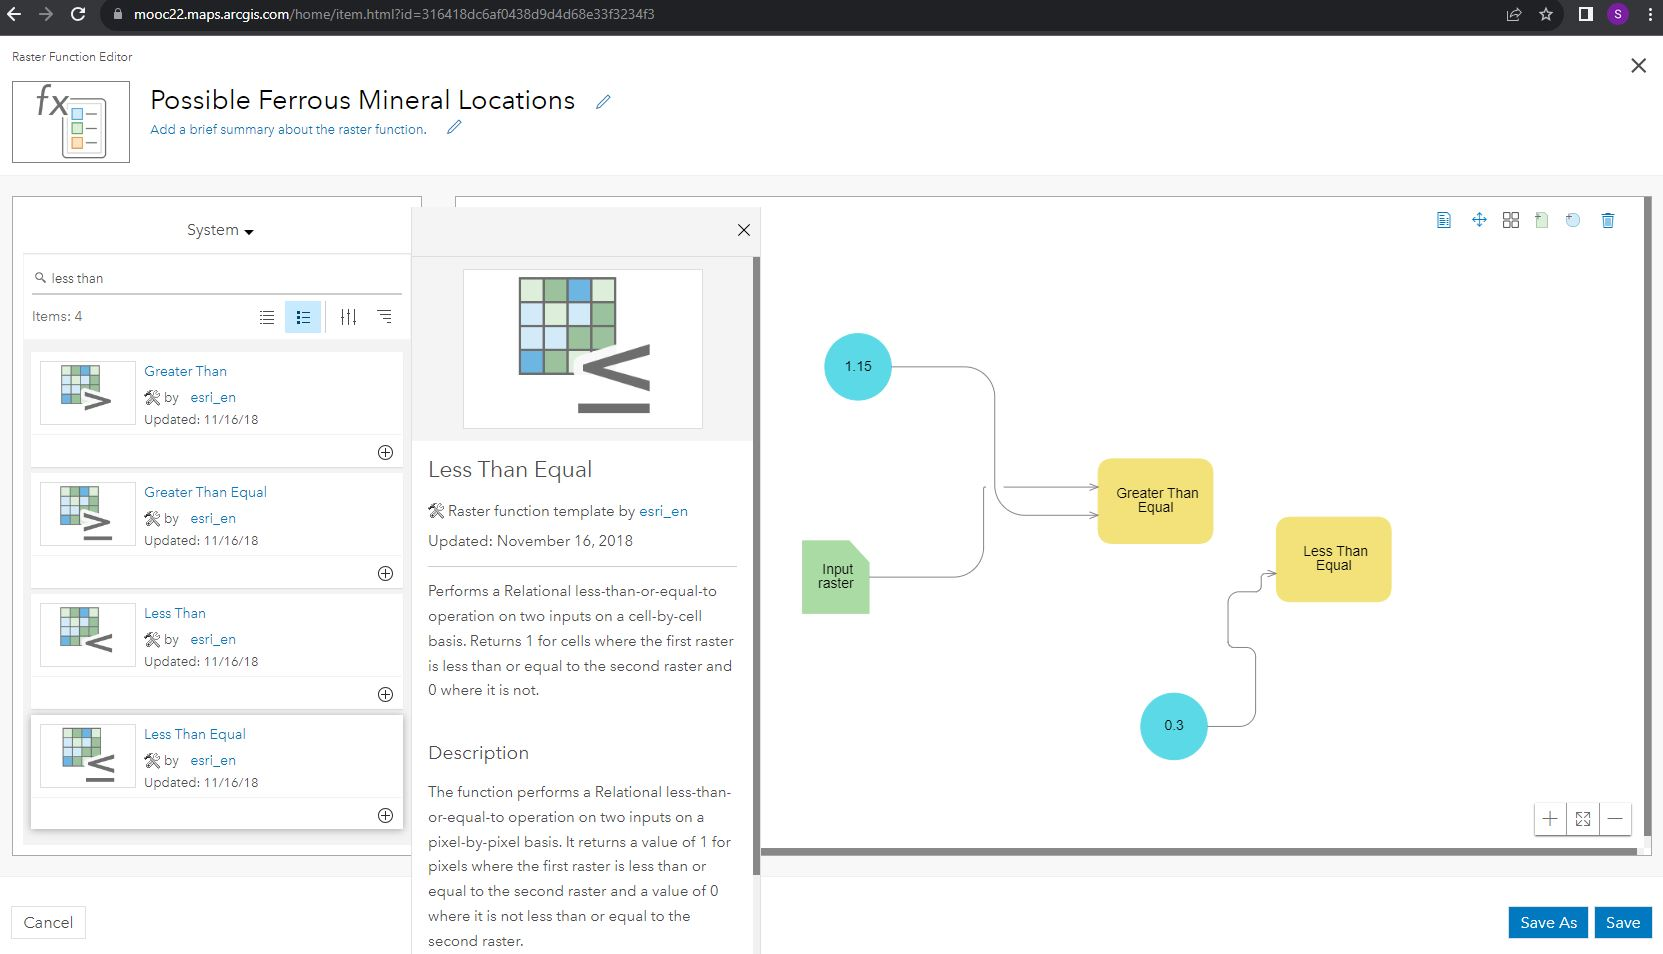

>Note: Your display may vary, depending on the size of your window.

The functions will appear in the Raster Function Template.

6. Click anywhere in the template area to remove the emphasis on the threshold value.

> Note: The template will show the last modified function or parameter by maintaining the selection.

7. Near the upper-right corner of the Raster Function Template, click the Auto Layout button .

Because you are using the same input raster for both functions, you will also connect the Input Raster to the Less Than Equal function.

8. Click Input Raster and drag a connecting line to the Less Than Equal function's Raster entry.

9. Click the Auto Layout button .


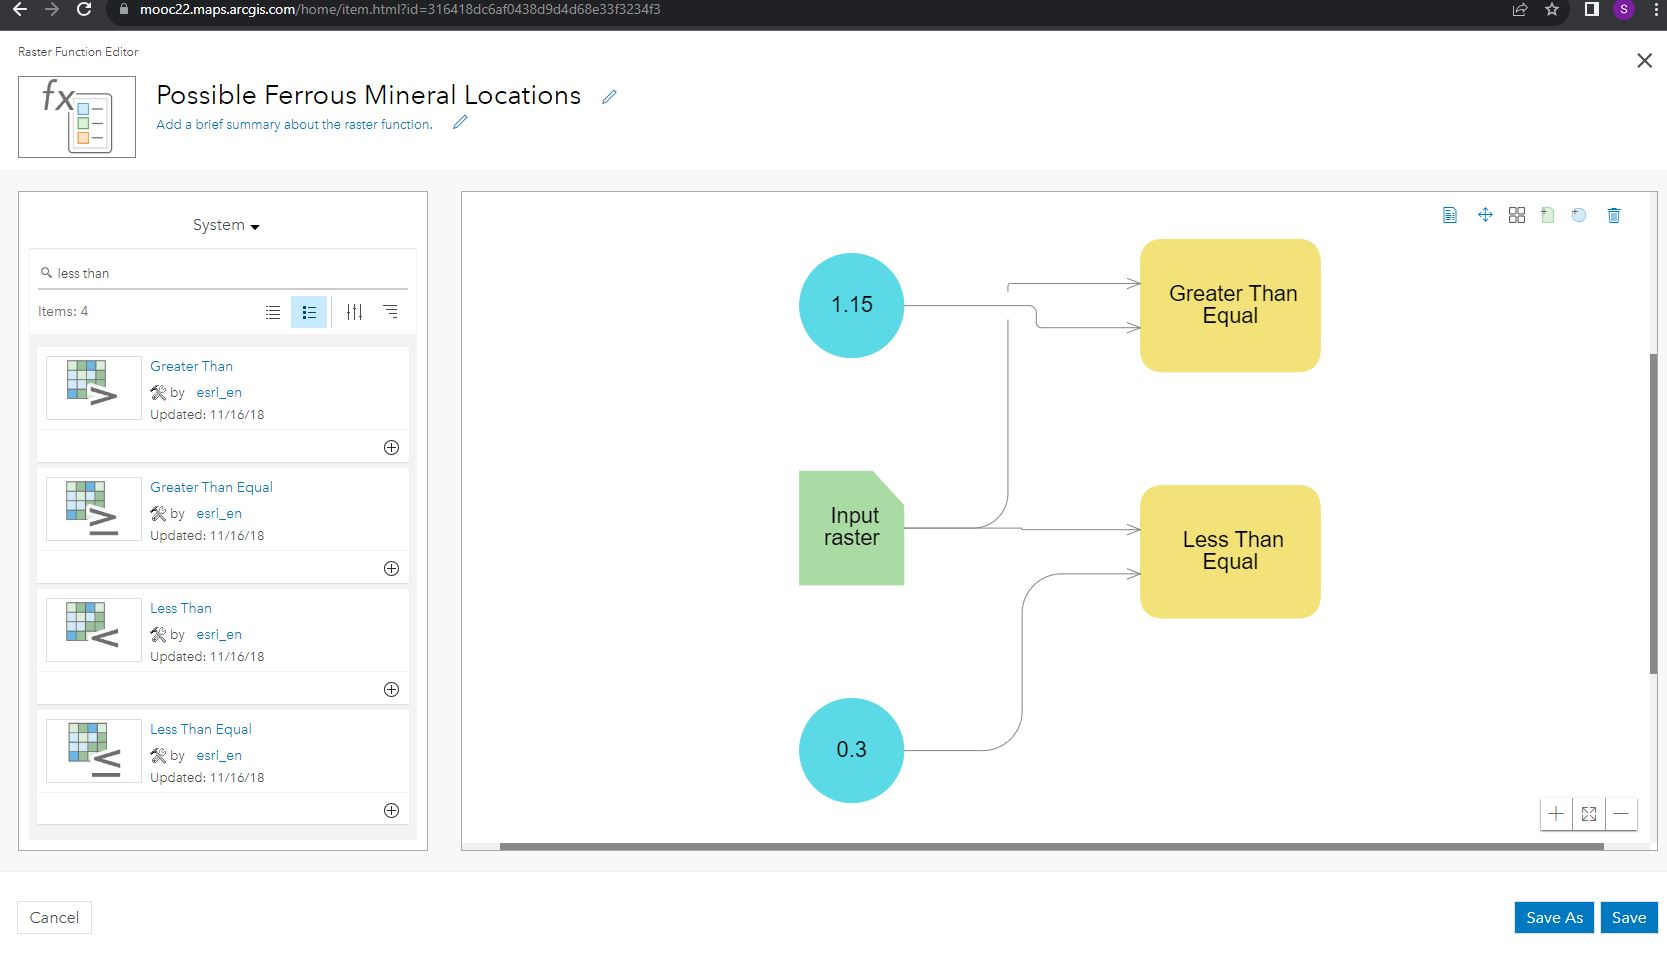

Now that you have set an upper and lower threshold for raster values, you will combine the raster functions to specifically locate values between both thresholds.

### **Combine raster functions in a raster function template**

In this step, you will complete the Raster Function Template by adding a Boolean And function that will locate pixel values within the specified threshold of 1.15 and 1.3. Values that fall within this range are more likely to indicate concentrations of ferrous minerals.

1. In the left pane, search for boolean and press Enter.

2. Add the `Boolean And` function to the template.

The Boolean And function has been added, and you are ready to combine the previous functions.

3. Drag a connection from the `Greater Than Equal` and `Less Than Equal function`s to the `Boolean And` function, connecting `Greater Than Equal` to Raster and `Less Than Equal` to Raster2.

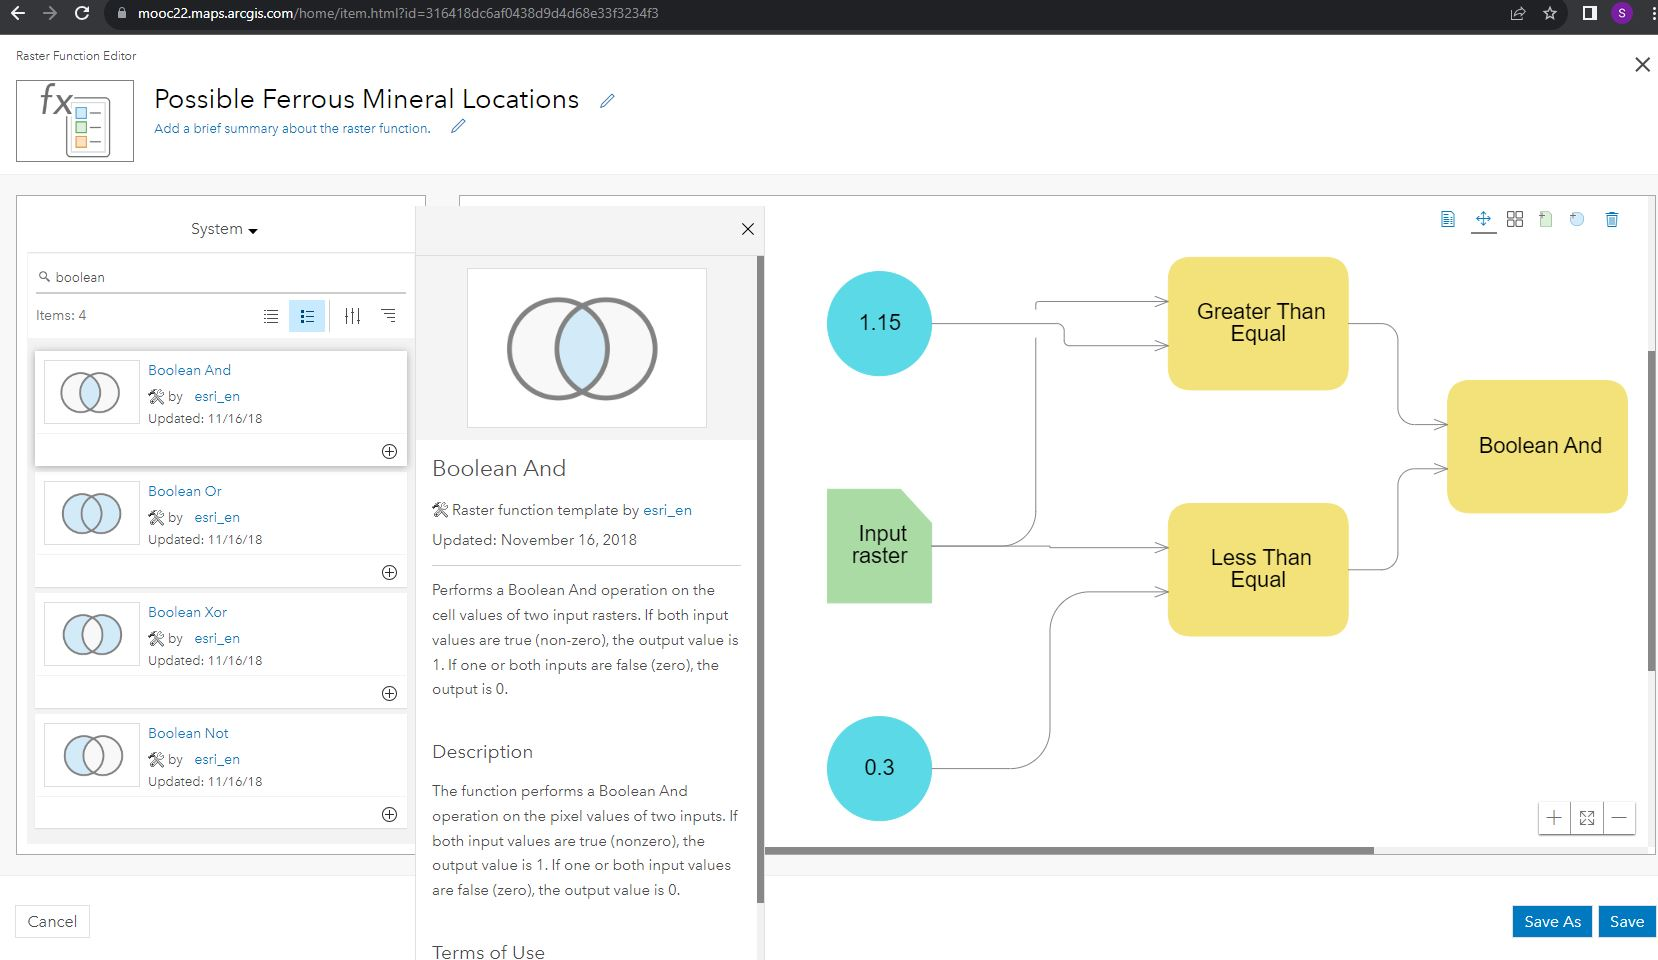

4. Click Save, and then click OK to confirm overwriting the existing item.

5. Close the Success window, if necessary.

6. In the top-right corner, click the Close button  to close the Raster Function Template.

The Raster Function Template is now complete and has been added as an item in your content. You are ready to run the template to discover areas containing ferrous minerals.

### **Run the raster function template**

In this step, you will run the raster function template that you just created. 

1. Open the `Fossil Exploration <your initials>` web map in Map Viewer. 

2. On the Settings toolbar, click the Analysis button .

3. In the Analysis pane, click Raster Functions, and then click `Open Raster Function Template`.

4. Select Possible Ferrous Mineral Locations and click Confirm.

5. In the Possible Ferrous Mineral Locations pane, specify the following parameters:

- Under Greater Than Equal, for Input Raster, choose `Ferrous_Minerals_<your initials>`.
- Under Result Layer, for Output Name, type `Prospective_Locations_<your initials>`.

6. Click Estimate Credits to determine the number of credits consumed.

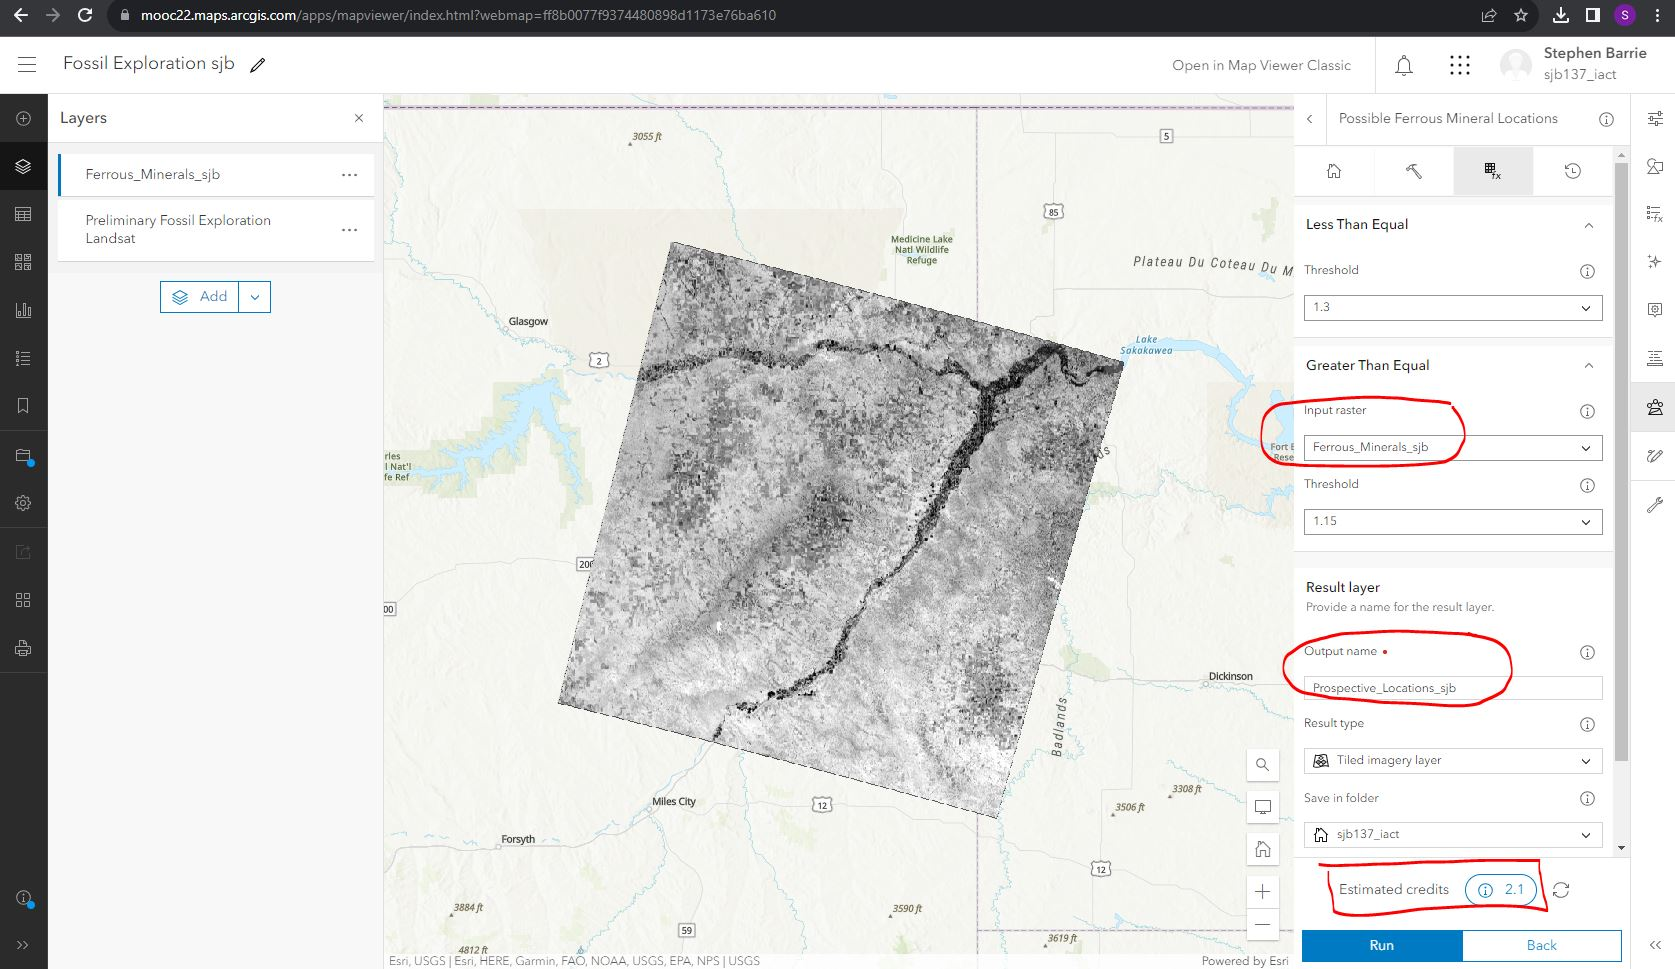

7. Leave the remaining defaults and click Run.

> Note: Processing will take some time to complete; do not click away from the web map until the layer is loaded.

8. In the Layers pane, confirm that the `Prospective_Locations_<your initials>` layer is selected. 

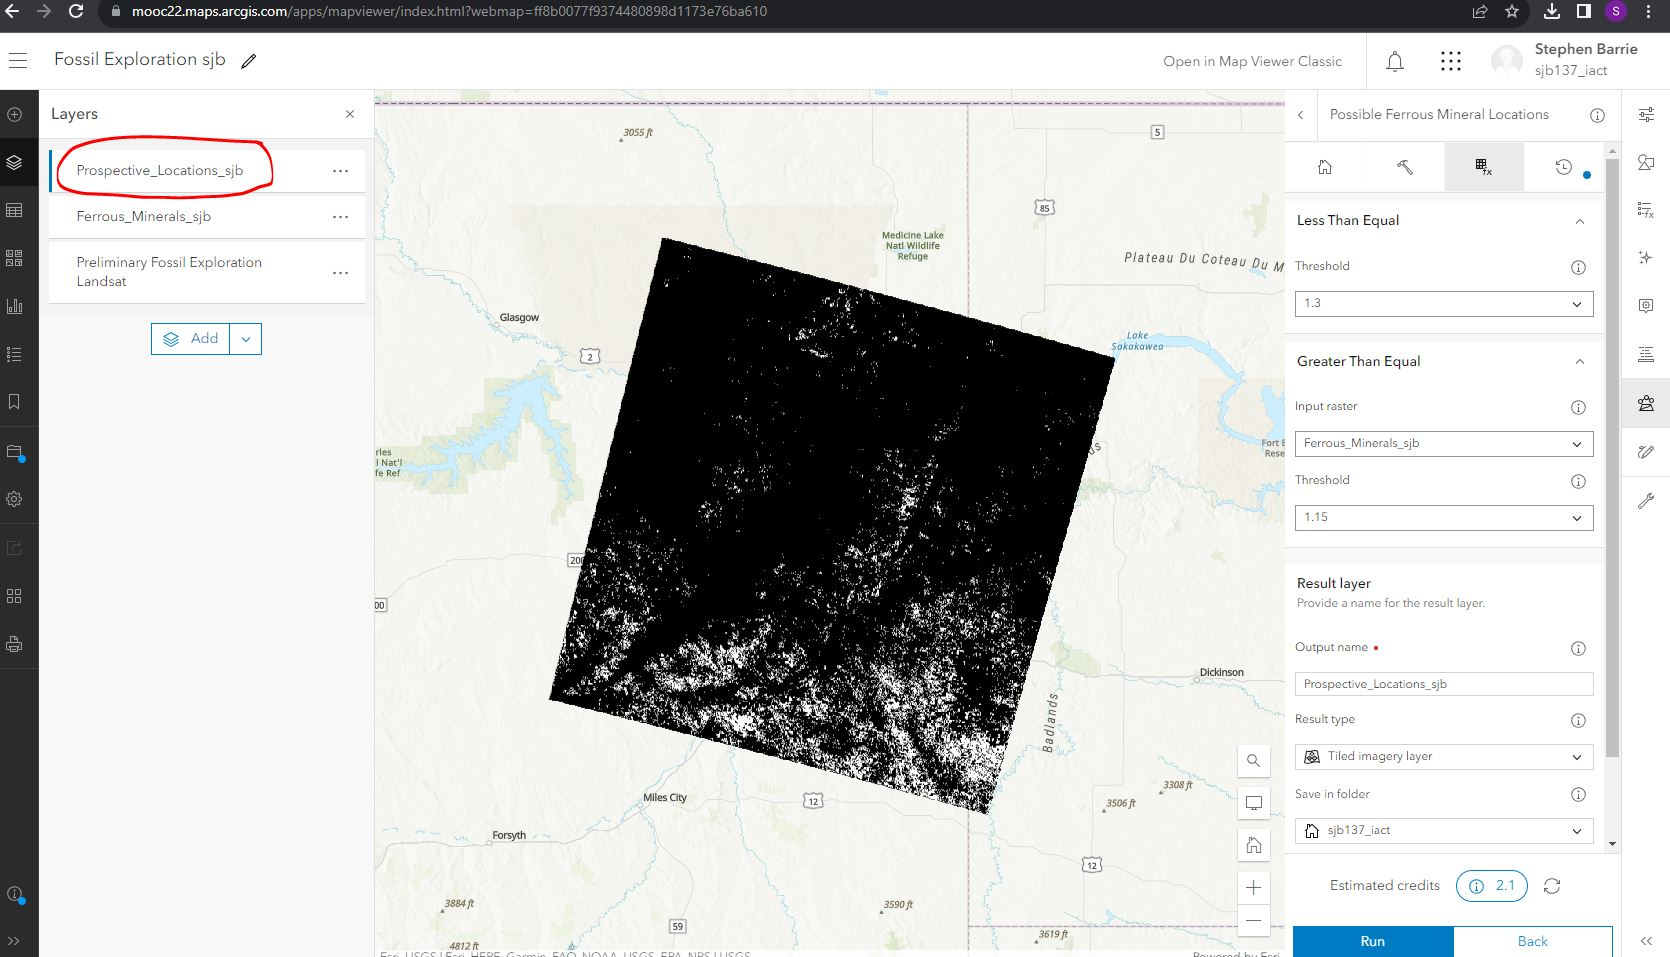

9. On the Settings toolbar, click the Styles button  and then in the Style pane, select Unique Values.

10. Under Unique Values, click Style Options. 

You will notice that there are two possible values: 0 and 1. The output when using the Boolean And function is either true, meaning that the pixel value falls within the specified range of 1.15 to 1.3, or false, meaning that the pixel value is outside the range. When the Boolean value is `true, a pixel value of 1` is returned. When the Boolean value is `false, a pixel value of 0` is returned. In this case, pixel value 0 (false) indicates pixel values that are outside the desired range for ferrous minerals. To better visualize the locations where ferrous minerals are concentrated, you will modify the symbology.

For the first value, click the Symbol color swatch, and then click the No Color option, as specified in the following graphic.

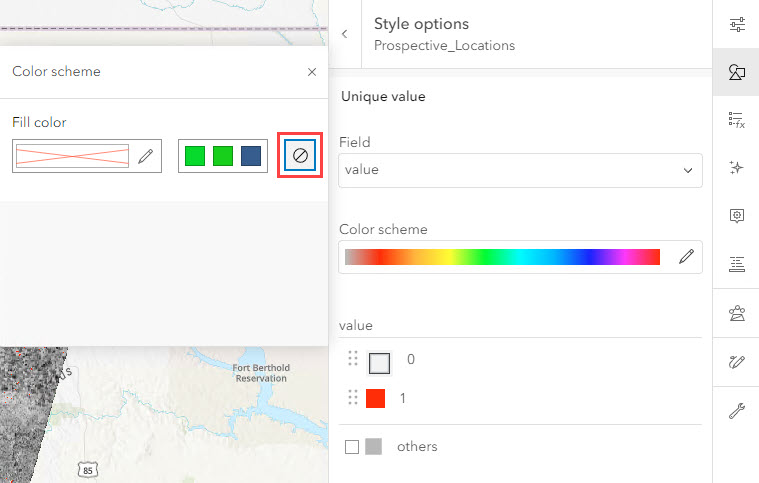

11. Change the other symbol color to blue.

12. Click the Value 1 and replace it with **Prospective Locations** and press Enter.

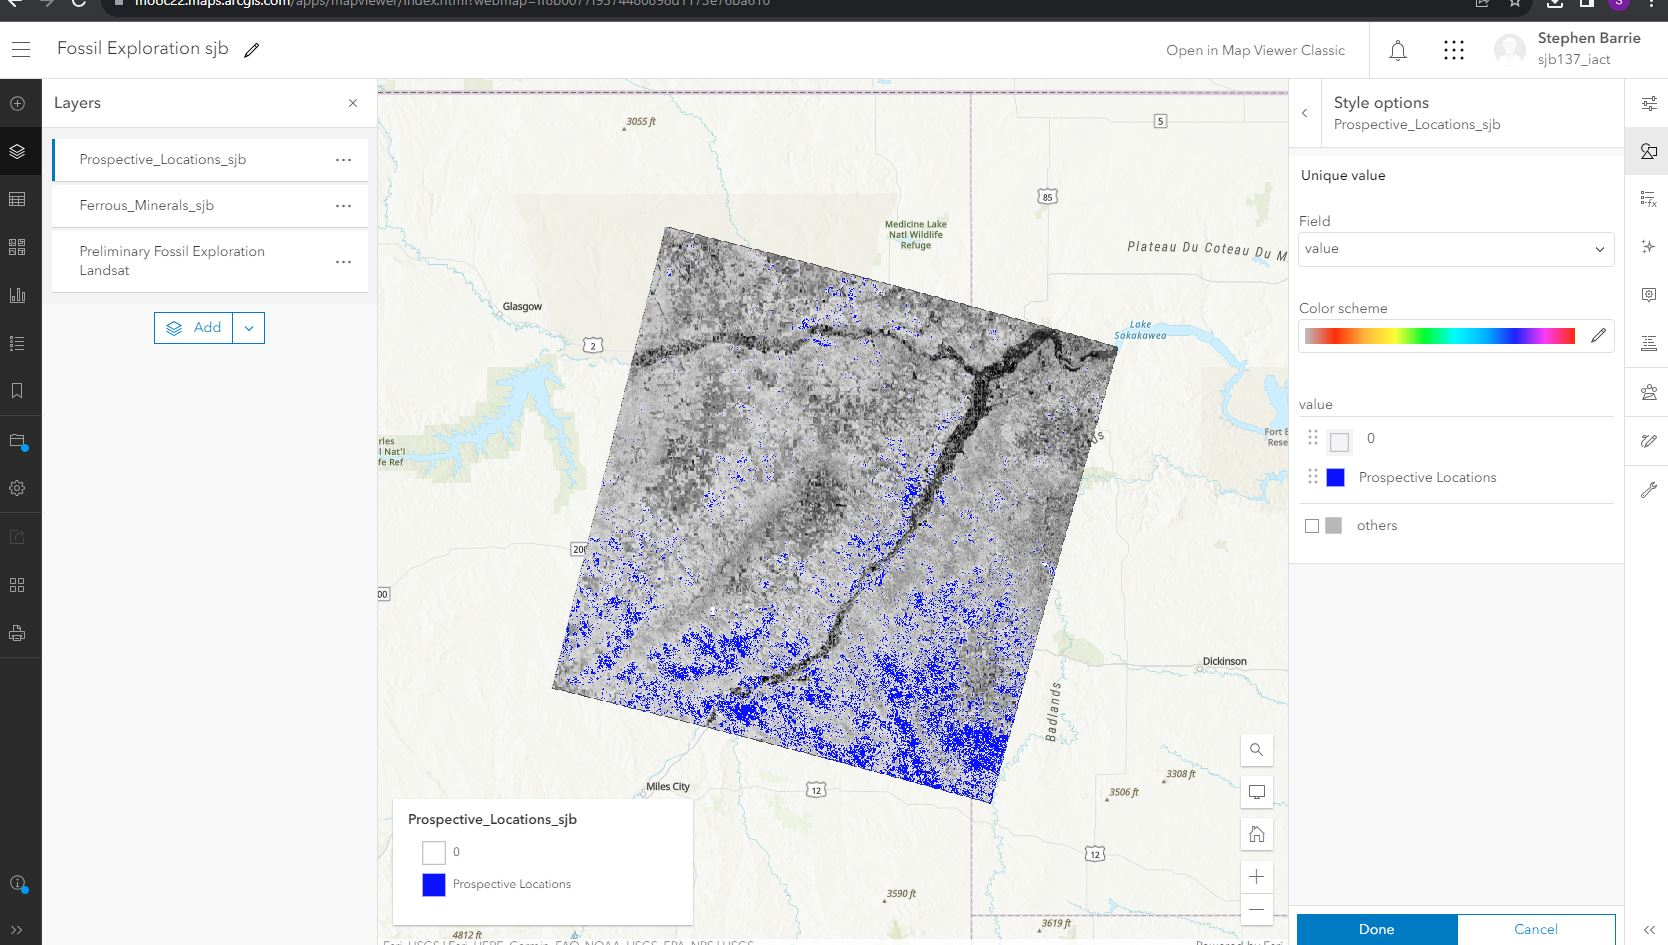

13. Click Done, and then click Done again to close the Style pane.

14. In the Layers pane, for the `Prospective_Locations_<your initials>` layer, click the Options button ! and choose Zoom To.

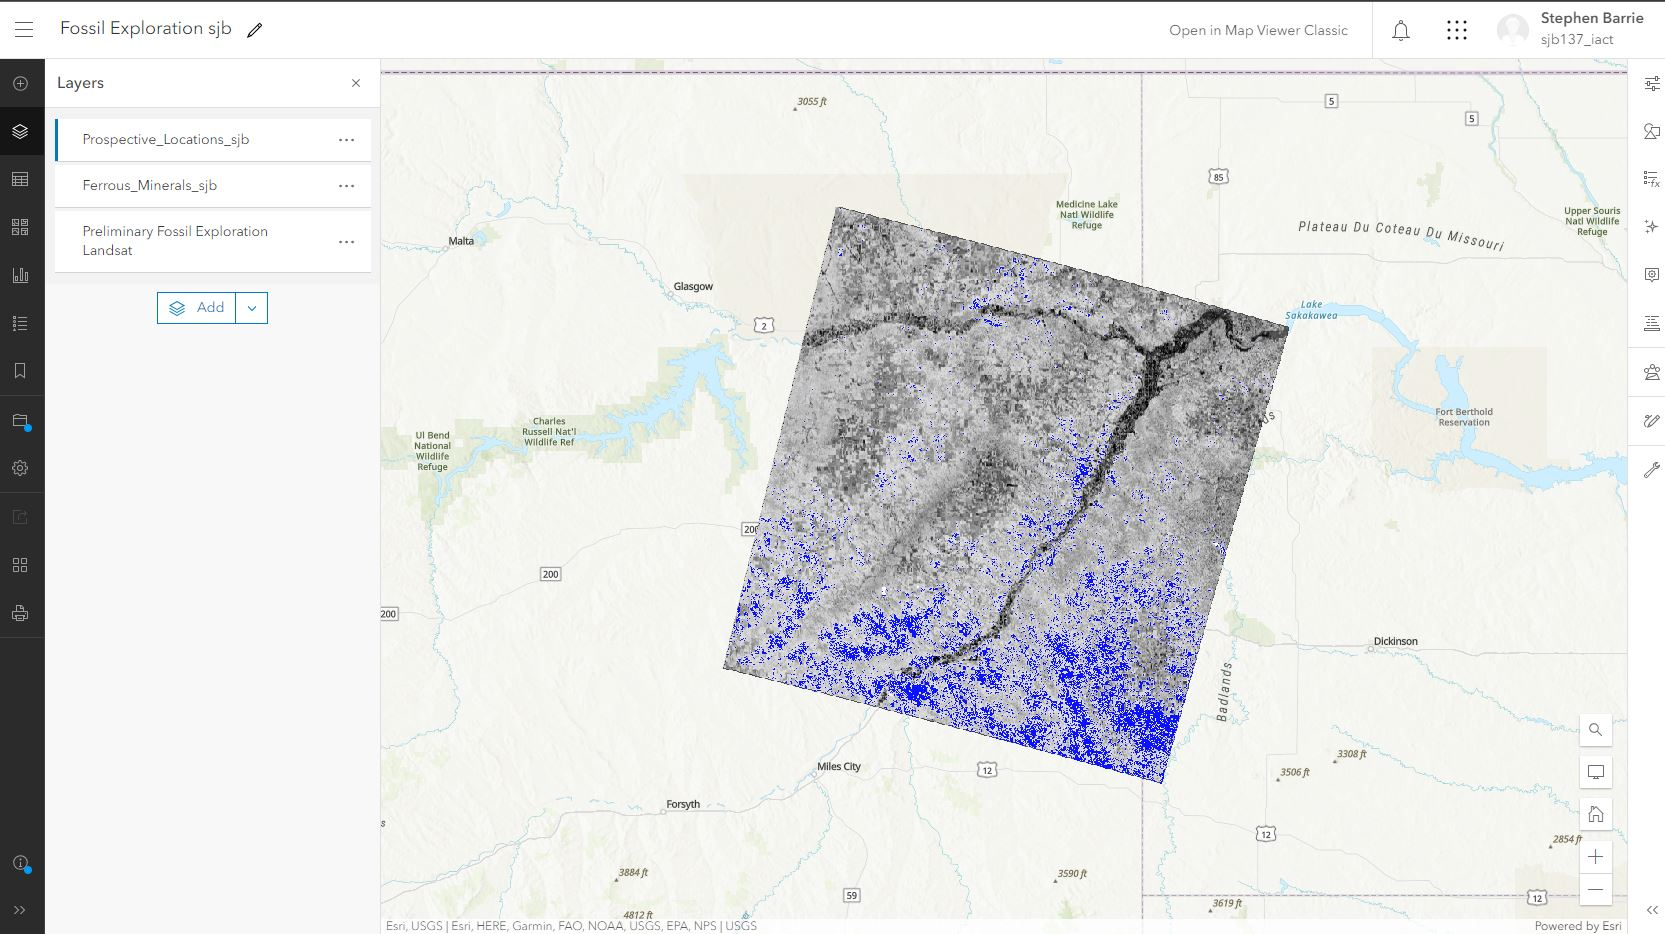

The areas in blue indicate the values from the Ferrous Mineral Calculation imagery layer that are between 1.15 and 1.3. Paleontologists are interested in these areas, so the Prospective Locations layer will be used in their fossil exploration study.

15. Save the map. 

In this exercise, you used ArcGIS Image for ArcGIS Online to create a layer to be used in a fossil exploration study. The output created can be shared with others in the organization as a tiled imagery layer. You can also share your saved Raster Function Template.

If you would like to continue your analysis, complete the optional stretch goal; otherwise, continue to the next exercise.